In [1]:
# 라이브러리 불러오기
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

# 모델 불러오기
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 
urllib.request.urlretrieve(model_url, model_file)

# 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

Matplotlib is building the font cache; this may take a moment.


## 사진 3장 배경 흐리게 인물 선명하게

In [68]:
# 이미지 불러오기
keria_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/keria.jpg'  
keria_orig = cv2.imread(keria_path)
러비_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/러비.jpg' 
러비_orig = cv2.imread(러비_path)
가을이_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/가을이.jpg' 
가을이_orig = cv2.imread(가을이_path)
똥괭이네_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/똥괭이네.JPG' 
똥괭이네_orig = cv2.imread(똥괭이네_path)

- T1 케리아!!
- 22똥괭이네 쫄보러비!!
https://www.youtube.com/@22cats
- 언제나가을 가을이!!
https://www.youtube.com/@%EC%96%B8%EC%A0%9C%EB%82%98%EA%B0%80%EC%9D%84ALWAYSFALL

다들 넘모 귀엽구만!!!

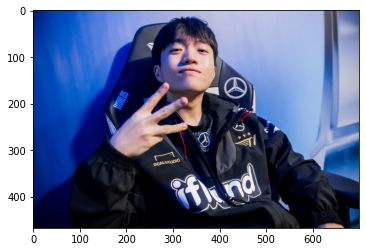

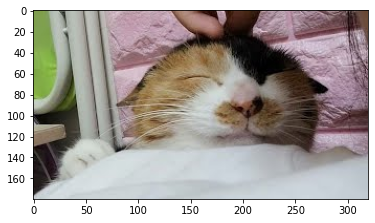

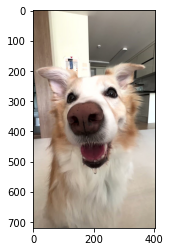

In [17]:
plt.imshow(cv2.cvtColor(keria_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(러비_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(가을이_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 모델이 이미지 입력

In [69]:
# 모델에 이미지 입력
segvalues1, output1 = model.segmentAsPascalvoc(keria_path)
segvalues2, output2 = model.segmentAsPascalvoc(러비_path)
segvalues3, output3 = model.segmentAsPascalvoc(가을이_path)
segvalues4, output4 = model.segmentAsPascalvoc(똥괭이네_path)

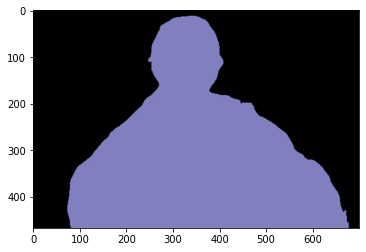

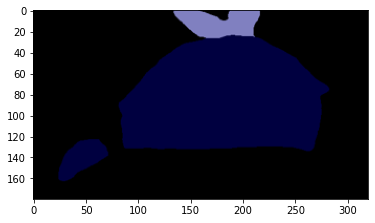

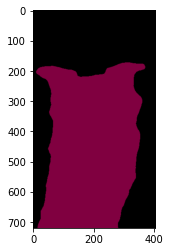

In [21]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
    
# 라벨로 나눠 이미지 출력
plt.imshow(output1)
plt.show()
plt.imshow(output2)
plt.show()
plt.imshow(output3)
plt.show()

In [45]:
# 클래스 저장
class_ids1 = segvalues1["class_ids"]
class_ids2 = segvalues2["class_ids"]
class_ids3 = segvalues3["class_ids"]

# 클래스 아이디 확인
for i, class_id in enumerate([class_ids1, class_ids2, class_ids3]):
    print(f"{i+1} 사진의 class id")
    for _ in class_id:
        print(f"   {_} : {LABEL_NAMES[_]}")

1 사진의 class id
   0 : background
   15 : person
2 사진의 class id
   0 : background
   8 : cat
   15 : person
3 사진의 class id
   0 : background
   12 : dog


- 러비 사진에 사람 손가락이 있는데 그걸 잡네!

### 틀에 맞게 색깔 설정하기

In [27]:
# 컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

# 사람 추출 
print(colormap[15])
# 고양이 추출
print(colormap[8])
# 강아지 추출
print(colormap[12])

[192 128 128]
[64  0  0]
[ 64   0 128]


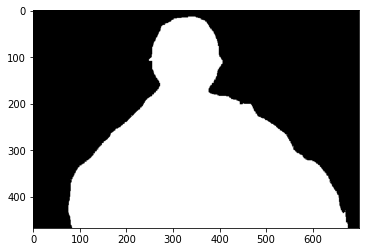

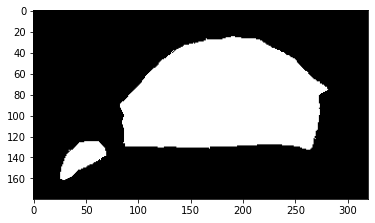

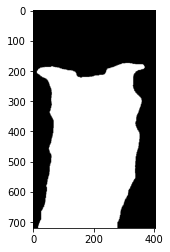

In [34]:
## 색상순서 변경
seg_color_person = (128, 128, 192)
seg_color_cat = (0, 0, 64)
seg_color_dog = (128, 0, 64)

seg_map1 = np.all(output1==seg_color_person, axis=-1) 
plt.imshow(seg_map1, cmap='gray')
plt.show()

seg_map2 = np.all(output2==seg_color_cat, axis=-1) 
plt.imshow(seg_map2, cmap='gray')
plt.show()

seg_map3 = np.all(output3==seg_color_dog, axis=-1) 
plt.imshow(seg_map3, cmap='gray')
plt.show()

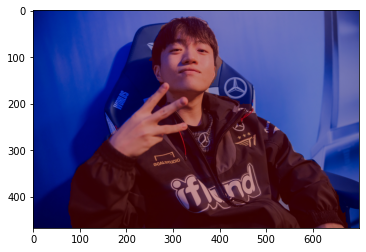

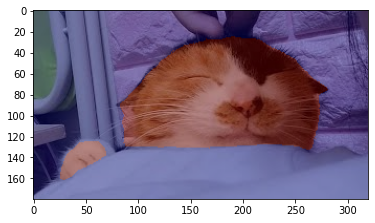

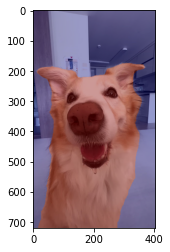

In [35]:
## 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show1 = keria_orig.copy()
img_show2 = 러비_orig.copy()
img_show3 = 가을이_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask1 = seg_map1.astype(np.uint8) * 255
img_mask2 = seg_map2.astype(np.uint8) * 255
img_mask3 = seg_map3.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask1 = cv2.applyColorMap(img_mask1, cv2.COLORMAP_JET)
color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)
color_mask3 = cv2.applyColorMap(img_mask3, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show1 = cv2.addWeighted(img_show1, 0.6, color_mask1, 0.4, 0.0)
img_show2 = cv2.addWeighted(img_show2, 0.6, color_mask2, 0.4, 0.0)
img_show3 = cv2.addWeighted(img_show3, 0.6, color_mask3, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB))
plt.show()

### 배경 흐리게 하기

In [41]:
## 배경 흐리게 만드는 함수
def bgblur_processor(img_orig, img_mask):
    img_orig_blur = cv2.blur(img_orig, (13,13))
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    return img_mask_color, img_bg_blur

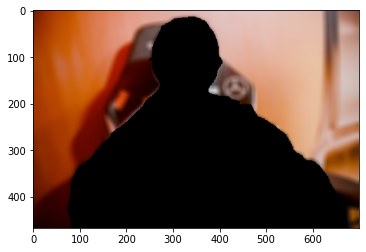

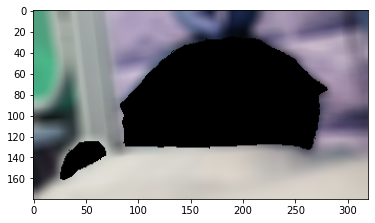

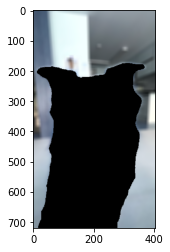

In [42]:
# 배경 흐리게 함수에 넣고 배경만 보이게 출력
img_mask_color1, img_bg_blur1 = bgblur_processor(keria_orig, img_mask1)
img_mask_color2, img_bg_blur2 = bgblur_processor(러비_orig, img_mask2)
img_mask_color3, img_bg_blur3 = bgblur_processor(가을이_orig, img_mask3)

plt.imshow(img_bg_blur1)
plt.show()
plt.imshow(img_bg_blur2)
plt.show()
plt.imshow(img_bg_blur3)
plt.show()

### 배경이랑 합친 후 완성!!

In [43]:
# 배경 합치기
keria_concat = np.where(img_mask_color1==255, keria_orig, img_bg_blur1)
러비_concat = np.where(img_mask_color2==255, 러비_orig, img_bg_blur2)
가을이_concat = np.where(img_mask_color3==255, 가을이_orig, img_bg_blur3)

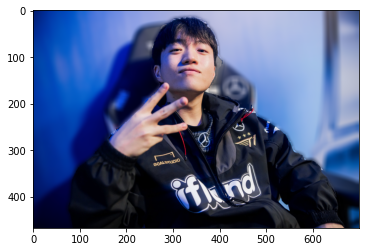

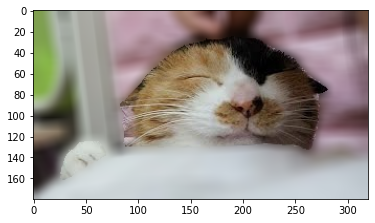

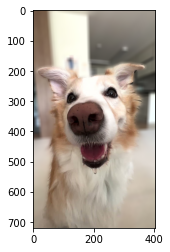

In [44]:
plt.imshow(cv2.cvtColor(keria_concat, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(러비_concat, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(가을이_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 사진에서 문제점 찾기

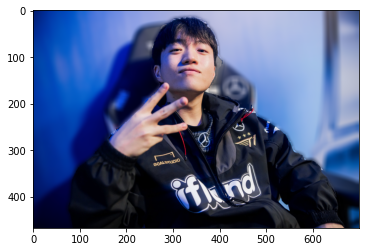

In [47]:
plt.imshow(cv2.cvtColor(keria_concat, cv2.COLOR_BGR2RGB))
plt.show()

- **팔 부분의 경계전이 깔끔하게 나눠지지 않았다**
- 케라아 사진에서 뒤에 있는 의자의 등받이나 팔걸이는 분류하지 못할 수도 있다고 생각했는데 문제 없이 잘 구분하였다

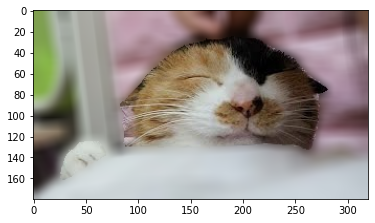

In [48]:
plt.imshow(cv2.cvtColor(러비_concat, cv2.COLOR_BGR2RGB))
plt.show()

- 왼쪽에 나와있는 러비의 손을 구분하지 못하고 배경과 함께 블러처리를 할거라고 생각했는데 작은 손도 고양이라고 분류하였다
- 위의 손가락도 사람으로 구분해서 배경과 함께 블러처리를 했다
- **수염쪽이 배경과 수염의 경계가 명확하지 않았다**

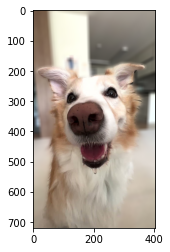

In [49]:
plt.imshow(cv2.cvtColor(가을이_concat, cv2.COLOR_BGR2RGB))
plt.show()

- 가을이도 문제 없이 배경과 가을이가 잘 분류되어 나왔다

### 배경 크로마키

(702, 1280, 3)


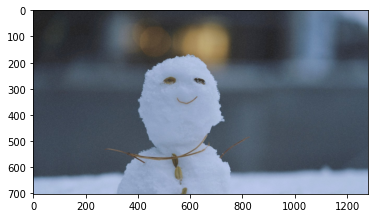

In [52]:
# 배경 이미지 불러오기
snow_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/snow.jpg'
snow_img_orig = cv2.imread(snow_img_path) 
print(snow_img_orig.shape)
plt.imshow(cv2.cvtColor(snow_img_orig, cv2.COLOR_BGR2RGB))

- 새로운 배경 사진을 불러오고

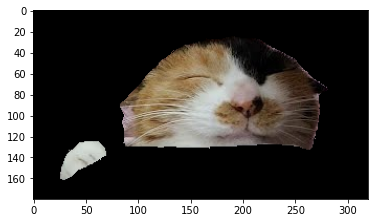

In [56]:
# 러비만 남기고 나머지는 0(검은색) 처리
러비_only_img_concat = np.where(img_mask_color2==255, 러비_concat, 0)

# 이미지 resize
h, w, c = 러비_only_img_concat.shape
# 원래 크기보다 1/4로 줄임
러비_img_resize = cv2.resize(러비_only_img_concat, (w//4, h//4), cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(러비_only_img_concat, cv2.COLOR_BGR2RGB))

- 아까랑 반대로 배경을 없애고 러비만 남겼다

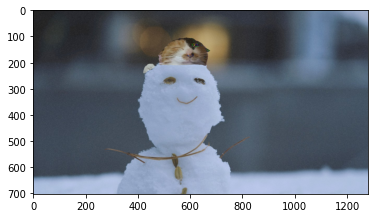

In [63]:
snow_img_show = snow_img_orig.copy()

# 러비 사진 위치 설정
refined_y = 80
refined_x = 395

# 투명도
alpha = 0.2 

# 배경에 러비 붙이기
sticker_area = snow_img_show[refined_y:refined_y+러비_only_img_concat.shape[0], refined_x:refined_x+러비_only_img_concat.shape[1]]
snow_img_show[refined_y:refined_y +러비_only_img_concat.shape[0], refined_x:refined_x+러비_only_img_concat.shape[1]] = \
cv2.addWeighted(sticker_area, alpha, np.where(러비_only_img_concat==0,sticker_area,러비_only_img_concat).astype(np.uint8), 1-alpha, 0)
plt.imshow(cv2.cvtColor(snow_img_show, cv2.COLOR_BGR2RGB))

- 눈사람 사진에 러비를 적절한 위치에 합쳤다

## 여러마리의 똥괭이네

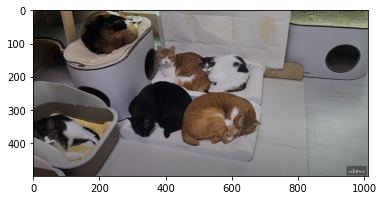

background
cat


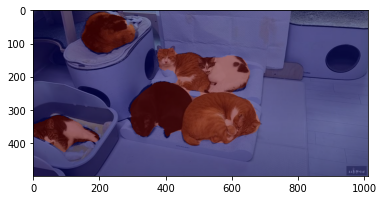

In [80]:
plt.imshow(cv2.cvtColor(똥괭이네_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(output4)

# 클래스 아이디 확인
class_ids4 = segvalues4["class_ids"]
for class_id in segvalues4['class_ids']:
    print(LABEL_NAMES[class_id])

# 컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)
for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

# 색상 순서 변경
seg_color_cat = (0, 0, 64)
seg_map4 = np.all(output4==seg_color_cat, axis=-1) 
plt.imshow(seg_map4, cmap='gray')

# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show4 = 똥괭이네_orig.copy()
img_mask4 = seg_map4.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask4 = cv2.applyColorMap(img_mask4, cv2.COLORMAP_JET)
img_show4 = cv2.addWeighted(img_show4, 0.6, color_mask4, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show4, cv2.COLOR_BGR2RGB))
plt.show()

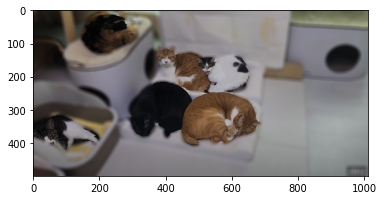

In [79]:
# 전체 블러처리
똥괭이네_orig_blur = cv2.blur(똥괭이네_orig, (13,13))
plt.imshow(cv2.cvtColor(똥괭이네_orig_blur, cv2.COLOR_BGR2RGB))

# 흐려진 배경만 남김
똥괭이네_mask_color = cv2.cvtColor(img_mask4, cv2.COLOR_GRAY2BGR)
똥괭이네_bg_mask = cv2.bitwise_not(똥괭이네_mask_color)
똥괭이네_bg_blur = cv2.bitwise_and(똥괭이네_orig_blur, 똥괭이네_bg_mask)
plt.imshow(cv2.cvtColor(똥괭이네_bg_blur, cv2.COLOR_BGR2RGB))

# 배경, 원본 합침
똥괭이네_concat = np.where(똥괭이네_mask_color==255, 똥괭이네_orig, 똥괭이네_bg_blur)
plt.imshow(cv2.cvtColor(똥괭이네_concat, cv2.COLOR_BGR2RGB))
plt.show()

- 여러마리의 똥괭이네도 잘 인식한다
- 배경과 고양이들의 경계가 뚜렸하지 않은 것 같다

### 회고

- 각각의 포인트를 잘 잡는 것 같다
- 러비 사진에서 사람 손과 고양이 손을 모두 잘 분류했다
- 하지만 러비의 수염 부분과 배경을 잘 인식하지 못하는 부분이 있었다
- 또한 여러마리의 똥괭이네가 있는 부분에서도 정확하게 고양이를 인식하지 못하는 부분이 있다  

**문제점**
- 오래된 모델이라 정확하게 인식이 안될수도 있다
- 라벨의 종류가 적어서 정확하게 분류하지 못할수도 있다